
<font size="5">**Cactus Image Classification using Convolutional Neural Networks**</font>

This is notebook is a submission file for a Kaggle competition: Aerial Cactus Identification
(link: https://www.kaggle.com/c/aerial-cactus-identification/overview)

The submission achieved **99.8% accuracy** on the held out test set. 

A convolutional neural network (**CNN**) is used, which was created using **tensorflow**.\
**Data augmentation** was employed: 45 angle rotations and horizontal flips were used as these transformation would create images that would resemble the original images. (Vertical flips would result in upside down cacti which would not be a realistic image)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf  # the deep learning library and all its components
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau, LambdaCallback, CSVLogger, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
import skimage

import cv2  # computer vision library

from sklearn.model_selection import train_test_split  # function used for data splitting 
import matplotlib.pyplot as plt  # library used for training curve plotting

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
train_df = pd.read_csv("../input/train.csv")
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
#defining basic variables (data directories, image shape) and reading in some data

Train_Dir = "../input/train/train/"
train_labels = "../input/train.csv"
Test_Dir = "../input/test/test/"

img_shape = (32,32,3)

label_list = list(train_df['has_cactus'])
img_id_list = list(train_df['id'])
img_id_list[:5]

['0004be2cfeaba1c0361d39e2b000257b.jpg',
 '000c8a36845c0208e833c79c1bffedd1.jpg',
 '000d1e9a533f62e55c289303b072733d.jpg',
 '0011485b40695e9138e92d0b3fb55128.jpg',
 '0014d7a11e90b62848904c1418fc8cf2.jpg']

In [4]:
# functions for reading an image given path
def read_img(image, Dir):
    img = cv2.imread(Dir + image)
    return img

# function for reading and normalizing image given path
def read_standard_img(image, Dir):
    img = read_img(image, Dir)
    img = img/255  # divide by 255 so all pixels are between 0 and 1
    return img

In [6]:
# here we randomly split the data into training and validation sets with a 85%-15% split 
# two lists of images are created: a training and a validation list

split_ratio = 0.15

train_img_id, val_img_id, train_label_list, val_label_list = train_test_split\
                    (img_id_list,label_list, test_size = split_ratio, random_state = 21)
train_img_list = []
for img in train_img_id:
    train_img_list.append(read_standard_img(img, Train_Dir))
    
val_img_list = []
for img in val_img_id:
    val_img_list.append(read_standard_img(img,Train_Dir))


In [7]:
# create list of test images from test directory 

test_img_id = os.listdir(Test_Dir)
test_img_list = []
for img in test_img_id:
    test_img_list.append(read_standard_img(img, Test_Dir))


[array([[[0.25490196, 0.31764706, 0.40784314],
         [0.2745098 , 0.3372549 , 0.42745098],
         [0.29019608, 0.35686275, 0.43921569],
         ...,
         [0.30588235, 0.34509804, 0.4627451 ],
         [0.40392157, 0.44313725, 0.56078431],
         [0.2627451 , 0.30196078, 0.41960784]],
 
        [[0.25098039, 0.31372549, 0.40392157],
         [0.27058824, 0.33333333, 0.42352941],
         [0.30588235, 0.37254902, 0.45490196],
         ...,
         [0.30588235, 0.34509804, 0.4627451 ],
         [0.35686275, 0.39607843, 0.51372549],
         [0.29019608, 0.32941176, 0.44705882]],
 
        [[0.16862745, 0.23529412, 0.31764706],
         [0.16470588, 0.23137255, 0.31372549],
         [0.15686275, 0.22352941, 0.30588235],
         ...,
         [0.40784314, 0.44705882, 0.56470588],
         [0.37647059, 0.41568627, 0.53333333],
         [0.20392157, 0.24313725, 0.36078431]],
 
        ...,
 
        [[0.38823529, 0.44313725, 0.53333333],
         [0.41176471, 0.46666667, 0.55686

In [10]:
flip_1=[]
flip_1_labels=[]

rot=[]
rot_labels=[]

counter=0

for img in train_img_list:
    flip_1.append(np.fliplr(img))
    rot.append(skimage.transform.rotate(img, angle=45, mode='reflect'))
    
    if (train_label_list[counter] == 1):
        flip_1_labels.append(1)
        rot_labels.append(1)
    else:
        flip_1_labels.append(0)
        rot_labels.append(0)
        
    counter=counter+1
#     scale_out.append(skimage.transform.rescale(img, scale=2.0, mode='constant'))
#     scale_in.append(skimage.transform.rescale(img, scale=0.5, mode='constant'))
    
#We need to augment the label list as well 


In [11]:
# Augmenting the image set
train_img_list = train_img_list + flip_1 + rot
len(train_img_list)

44625

In [12]:
# Augmenting the image labels
train_label_list = train_label_list + flip_1_labels + rot_labels
len(train_label_list)

44625

In [14]:
def build_model():
    #tf.keras.backend.clear_session()
    #optimizer = Adam(lr=0.001)
    inputs = tf.keras.Input(shape=img_shape, name='input_branch')
    x = Conv2D(32, (5,5), activation='relu', input_shape = img_shape)(inputs)
    x = BatchNormalization(axis=3)(x)
    x = MaxPool2D((2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = BatchNormalization(axis=3)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = BatchNormalization(axis=3)(x)
    x = MaxPool2D((2,2))(x)
    x = Conv2D(64, (3,3), activation='relu')(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(axis=3)(x)
    x = MaxPool2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs,outputs = output, name='CNNmodel')
    
    return model

In [15]:
# Compiling the model that was designed in build_model()
# Adam is used as the optimization function and binary crossentropy is used as the loss function

model = build_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_branch (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)    

In [16]:
# Training - Fitting the model to the training data

callbacks=[
    ReduceLROnPlateau(monitor='val_loss',patience=7,min_lr=1e-9,verbose=1,mode='min'),
    ModelCheckpoint('cactusCNN.h5',monitor='val_loss',save_best_only=True,verbose=1)]

history = model.fit(np.asarray(train_img_list),np.asarray(train_label_list), 
          batch_size = 512, epochs = 40, 
          validation_data=(np.asarray(val_img_list),np.asarray(val_label_list)),
            callbacks=callbacks)

Train on 44625 samples, validate on 2625 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
44544/44625 [============================>.] - ETA: 0s - loss: 0.1413 - acc: 0.9428
Epoch 00001: val_loss improved from inf to 1.77926, saving model to cactusCNN.h5
44625/44625 [==============================] - 6s 133us/sample - loss: 0.1412 - acc: 0.9428 - val_loss: 1.7793 - val_acc: 0.2491
Epoch 2/40
43520/44625 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9718
Epoch 00002: val_loss did not improve from 1.77926
44625/44625 [==============================] - 2s 44us/sample - loss: 0.0725 - acc: 0.9722 - val_loss: 3.1682 - val_acc: 0.2491
Epoch 3/40
43520/44625 [============================>.] - ETA: 0s - loss: 0.0569 - acc: 0.9786
Epoch 00003: val_loss improved from 1.77926 to 1.48182, saving model to cactusCNN.h5
44625/44625 [==============================] - 2s 45us/sample - loss: 0.0566 - acc: 0.9787 - val_loss: 1.4818 - val_acc: 0.2773
Epoch 4/40
43520

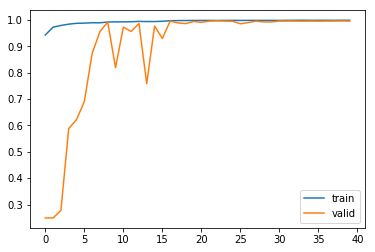

In [17]:
# Plotting the training curve 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.show()

In [18]:
# Performing predictions on the test images using the trained model

test_predictions = model.predict(np.asarray(test_img_list))
test_predictions[:5]

array([[9.4086385e-01],
       [3.1590462e-06],
       [9.9999630e-01],
       [9.9975097e-01],
       [2.4029273e-01]], dtype=float32)

In [19]:
# Creating a submission for the Kaggle competition

test_predictions_list = [pred[0] for pred in test_predictions]

submission_data = {'id': test_img_id, 'has_cactus': test_predictions_list}
submission_df = pd.DataFrame(submission_data)
submission_df.head()

[0.94086385, 3.1590462e-06, 0.9999963, 0.999751, 0.24029273]

In [21]:
submission_df.to_csv('submission.csv',index=False)